In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from math import ceil
warnings.filterwarnings("ignore") 

In [2]:
windowDf = pd.read_csv('./data/window.csv')

In [3]:
windowDf['window']=windowDf['second']-windowDf['first']
windowDf_avg = windowDf.groupby(['window']).mean().reset_index()
windowDf_avg = windowDf_avg[['window','Avg','min','max','var','std','nonzeros']]

In [4]:
windowDf_avg

,window,Avg,min,max,var,std,nonzeros
0,1,-0.000015,-0.419748,0.422409,0.001242,0.028423,0.710711
1,2,-0.000029,-0.470434,0.473092,0.002235,0.038639,0.747717
2,3,-0.000043,-0.492746,0.494999,0.002964,0.044911,0.767875
3,4,-0.000058,-0.506006,0.509122,0.003566,0.049545,0.781244
4,5,-0.000073,-0.514377,0.517514,0.004017,0.052950,0.790321
...,...,...,...,...,...,...,...
293,294,-0.004299,-0.611843,0.598863,0.014714,0.110238,0.922346
294,295,-0.004262,-0.611176,0.600221,0.014758,0.110365,0.921982
295,296,-0.004259,-0.609150,0.599412,0.014800,0.110503,0.921854
296,297,-0.004359,-0.608088,0.599412,0.014856,0.110746,0.922557


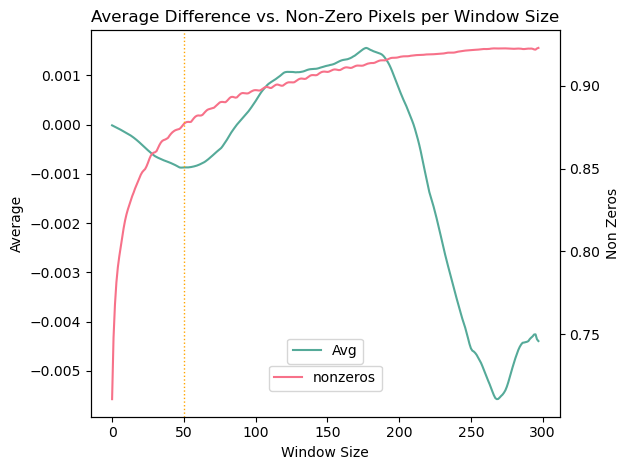

In [5]:
ax1= sns.lineplot(data=windowDf_avg[['Avg',]], palette=sns.color_palette("dark:#5A9_r"),legend='auto')
ax2 = plt.twinx()
sns.lineplot(data=windowDf_avg[['nonzeros',]] , palette=sns.color_palette("husl", 1), ax=ax2,legend='auto')
plt.axvline(x=50, linewidth=1, color='orange', ls=':')
sns.move_legend(ax1, "upper center" ,bbox_to_anchor=(.5, .22))
sns.move_legend(ax2, "upper center", bbox_to_anchor=(.5, .15))
ax1.set_ylabel('Average')
ax2.set_ylabel('Non Zeros')
ax1.set_xlabel('Window Size')
ax1.set_title('Average Difference vs. Non-Zero Pixels per Window Size')
plt.tight_layout()


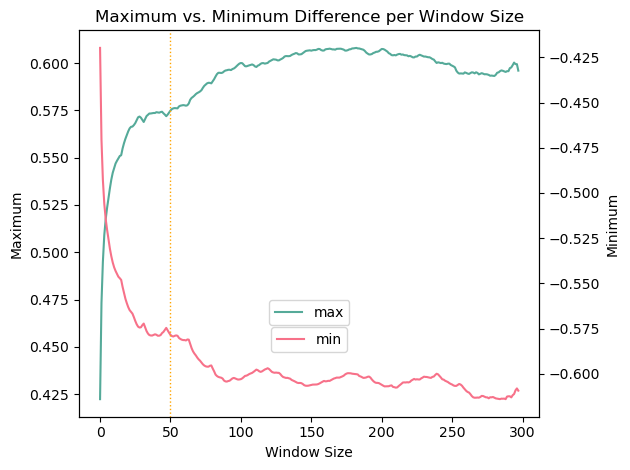

In [9]:
ax1= sns.lineplot(data=windowDf_avg[['max',]], palette=sns.color_palette("dark:#5A9_r"),legend='auto')
ax2 = plt.twinx()
sns.lineplot(data=windowDf_avg[['min',]] , palette=sns.color_palette("husl", 1), ax=ax2,legend='auto')
plt.axvline(x=50, linewidth=1, color='orange', ls=':')
sns.move_legend(ax1, "upper center" ,bbox_to_anchor=(.5, .32))
sns.move_legend(ax2, "upper center", bbox_to_anchor=(.5, .25))
ax1.set_ylabel('Maximum')
ax2.set_ylabel('Minimum')
ax1.set_xlabel('Window Size')
ax1.set_title('Maximum vs. Minimum Difference per Window Size')
plt.tight_layout()


In [7]:
derivative = np.diff(windowDf_avg['Avg']) / np.diff(windowDf_avg['window'])
derivative = np.insert(derivative, 0, np.nan)
windowDf_avg['first_derivative'] = derivative

Text(70, -2.8300489925712426e-05, 'Derivative Value: 0.00000')

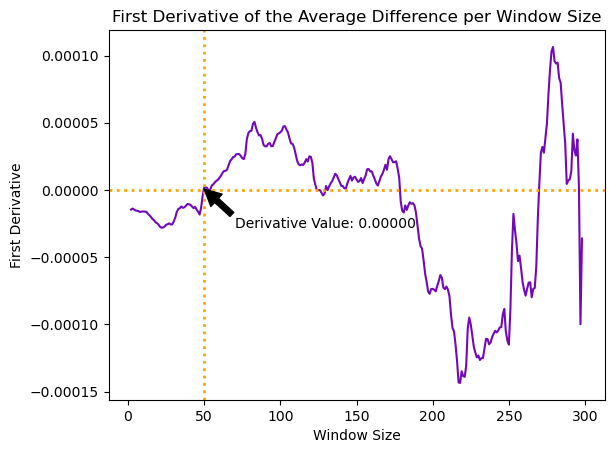

In [8]:

ax = sns.lineplot(windowDf_avg,x='window',y='first_derivative',color='#7209B7')
ax.axhline(y=0, linewidth=2, color='orange', ls=':')
ax.axvline(x=50, linewidth=2, color='orange', ls=':')
ax.set_ylabel('First Derivative')
ax.set_xlabel('Window Size')
ax.set_title('First Derivative of the Average Difference per Window Size')

window_size_value = 50
y_value = windowDf_avg[windowDf_avg['window'] == window_size_value]['first_derivative'].values[0]


plt.annotate(f'Derivative Value: {format(y_value, '.5f')}', xy=(window_size_value, y_value-0.000001), xytext=(window_size_value+20, y_value-0.00003),
             arrowprops=dict(facecolor='black', shrink=0.001))

